# Hyperparameter Tuning Comparison

Comparing Ridge regression hyperparameter tuning results between basic and advanced feature engineering pipelines.


In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load hyperparameter tuning results
tuned_results_dir = '../../models/tuned/'

try:
    with open(f'{tuned_results_dir}/ridge_basic_tuning_results.pkl', 'rb') as f:
        ridge_basic_tuning = pickle.load(f)
    with open(f'{tuned_results_dir}/ridge_advanced_tuning_results.pkl', 'rb') as f:
        ridge_advanced_tuning = pickle.load(f)
    
    print("✓ All hyperparameter tuning results loaded")
    
except FileNotFoundError as e:
    print(f"Missing results file: {e}")
    print("Please run notebooks 5-1 and 5-2 first")


✓ All hyperparameter tuning results loaded


In [3]:
# Create comparison table for tuned models
tuning_comparison = []

# Ridge Basic Tuned
tuning_comparison.append({
    'Model': 'Ridge Basic (Tuned)',
    'RMSE': ridge_basic_tuning['final_cv_rmse'],
    'RMSE_std': ridge_basic_tuning['final_cv_rmse_std'],
    'MAE': ridge_basic_tuning['final_cv_mae'],
    'MAE_std': ridge_basic_tuning['final_cv_mae_std'],
    'R²': ridge_basic_tuning['final_cv_r2'],
    'R²_std': ridge_basic_tuning['final_cv_r2_std'],
    'Best_Alpha': ridge_basic_tuning['best_params']['regressor__model__alpha'],
    'Best_Solver': ridge_basic_tuning['best_params']['regressor__model__solver'],
    'Best_Threshold': ridge_basic_tuning['best_params']['regressor__select__threshold']
})

# Ridge Advanced Tuned
tuning_comparison.append({
    'Model': 'Ridge Advanced (Tuned)',
    'RMSE': ridge_advanced_tuning['final_cv_rmse'],
    'RMSE_std': ridge_advanced_tuning['final_cv_rmse_std'],
    'MAE': ridge_advanced_tuning['final_cv_mae'],
    'MAE_std': ridge_advanced_tuning['final_cv_mae_std'],
    'R²': ridge_advanced_tuning['final_cv_r2'],
    'R²_std': ridge_advanced_tuning['final_cv_r2_std'],
    'Best_Alpha': ridge_advanced_tuning['best_params']['regressor__model__alpha'],
    'Best_Solver': ridge_advanced_tuning['best_params']['regressor__model__solver'],
    'Best_Threshold': ridge_advanced_tuning['best_params']['regressor__select__threshold']
})

tuning_comparison_df = pd.DataFrame(tuning_comparison)
tuning_comparison_df = tuning_comparison_df.sort_values('RMSE')  # Sort by RMSE (lower is better)

print("=== HYPERPARAMETER TUNING COMPARISON ===\n")
print("Final Cross-Validation Results (5-fold):")
print("-" * 80)
for _, row in tuning_comparison_df.iterrows():
    print(f"{row['Model']:<25} RMSE: ${row['RMSE']:>7,.0f} (±{row['RMSE_std']:>4,.0f})  "
          f"MAE: ${row['MAE']:>7,.0f} (±{row['MAE_std']:>3,.0f})  R²: {row['R²']:>6.4f} (±{row['R²_std']:>5.4f})")
print("-" * 80)


=== HYPERPARAMETER TUNING COMPARISON ===

Final Cross-Validation Results (5-fold):
--------------------------------------------------------------------------------
Ridge Basic (Tuned)       RMSE: $ 21,622 (±3,281)  MAE: $ 13,618 (±890)  R²: 0.9212 (±0.0261)
Ridge Advanced (Tuned)    RMSE: $ 22,063 (±2,372)  MAE: $ 13,589 (±628)  R²: 0.9195 (±0.0197)
--------------------------------------------------------------------------------


In [4]:
# Best tuned model summary
best_tuned_model = tuning_comparison_df.iloc[0]
print(f"\nBest Tuned Model: {best_tuned_model['Model']}")
print(f"   RMSE: ${best_tuned_model['RMSE']:,.0f} (±${best_tuned_model['RMSE_std']:,.0f})")
print(f"   MAE:  ${best_tuned_model['MAE']:,.0f} (±${best_tuned_model['MAE_std']:,.0f})")
print(f"   R²:   {best_tuned_model['R²']:.4f} (±{best_tuned_model['R²_std']:.4f})")

print(f"\n   Best Hyperparameters:")
print(f"   Alpha: {best_tuned_model['Best_Alpha']:.6f}")
print(f"   Solver: {best_tuned_model['Best_Solver']}")
print(f"   Feature Selection Threshold: {best_tuned_model['Best_Threshold']}")



Best Tuned Model: Ridge Basic (Tuned)
   RMSE: $21,622 (±$3,281)
   MAE:  $13,618 (±$890)
   R²:   0.9212 (±0.0261)

   Best Hyperparameters:
   Alpha: 0.868511
   Solver: sag
   Feature Selection Threshold: mean


In [5]:
# Tuning phase comparison
print("\n=== TUNING PHASE ANALYSIS ===\n")

print("Ridge Basic Tuning Phases:")
print(f"  Phase 1 (Random Search): ${ridge_basic_tuning['phase_results']['random_search_rmse']:,.0f}")
print(f"  Phase 2 (Grid Search):   ${ridge_basic_tuning['phase_results']['grid_search_rmse']:,.0f}")
print(f"  Phase 3 (Final CV):      ${ridge_basic_tuning['phase_results']['final_cv_rmse']:,.0f}")

print(f"\nRidge Advanced Tuning Phases:")
print(f"  Phase 1 (Random Search): ${ridge_advanced_tuning['phase_results']['random_search_rmse']:,.0f}")
print(f"  Phase 2 (Grid Search):   ${ridge_advanced_tuning['phase_results']['grid_search_rmse']:,.0f}")
print(f"  Phase 3 (Final CV):      ${ridge_advanced_tuning['phase_results']['final_cv_rmse']:,.0f}")

# Calculate improvements from tuning
basic_improvement = ridge_basic_tuning['baseline_comparison']['rmse_improvement_pct']
advanced_improvement = ridge_advanced_tuning['baseline_comparison']['rmse_improvement_pct']

print(f"\n=== IMPROVEMENT FROM BASELINE ===\n")
print(f"Ridge Basic:")
print(f"  RMSE improvement: {basic_improvement:+.2f}%")
print(f"  R² improvement:   {ridge_basic_tuning['baseline_comparison']['r2_improvement_pct']:+.2f}%")

print(f"\nRidge Advanced:")
print(f"  RMSE improvement: {advanced_improvement:+.2f}%")
print(f"  R² improvement:   {ridge_advanced_tuning['baseline_comparison']['r2_improvement_pct']:+.2f}%")



=== TUNING PHASE ANALYSIS ===

Ridge Basic Tuning Phases:
  Phase 1 (Random Search): $21,622
  Phase 2 (Grid Search):   $21,622
  Phase 3 (Final CV):      $21,622

Ridge Advanced Tuning Phases:
  Phase 1 (Random Search): $22,143
  Phase 2 (Grid Search):   $22,063
  Phase 3 (Final CV):      $22,063

=== IMPROVEMENT FROM BASELINE ===

Ridge Basic:
  RMSE improvement: +2.36%
  R² improvement:   +0.59%

Ridge Advanced:
  RMSE improvement: +2.68%
  R² improvement:   +0.80%


In [6]:
# Load baseline models for comparison
try:
    # Load basic and advanced baseline results
    with open('../../models/basic/ridge_results.pkl', 'rb') as f:
        ridge_basic_baseline = pickle.load(f)
    with open('../../models/advanced/ridge_advanced_results.pkl', 'rb') as f:
        ridge_advanced_baseline = pickle.load(f)
    
    # Create comprehensive comparison including baselines
    comprehensive_comparison = []
    
    # Add baseline models
    comprehensive_comparison.append({
        'Model': 'Ridge Basic (Baseline)',
        'RMSE': ridge_basic_baseline['cv_rmse'],
        'RMSE_std': ridge_basic_baseline['cv_rmse_std'],
        'MAE': ridge_basic_baseline['cv_mae'],
        'MAE_std': ridge_basic_baseline['cv_mae_std'],
        'R²': ridge_basic_baseline['cv_r2'],
        'R²_std': ridge_basic_baseline['cv_r2_std'],
        'Type': 'Baseline'
    })
    
    comprehensive_comparison.append({
        'Model': 'Ridge Advanced (Baseline)',
        'RMSE': ridge_advanced_baseline['cv_rmse'],
        'RMSE_std': ridge_advanced_baseline['cv_rmse_std'],
        'MAE': ridge_advanced_baseline['cv_mae'],
        'MAE_std': ridge_advanced_baseline['cv_mae_std'],
        'R²': ridge_advanced_baseline['cv_r2'],
        'R²_std': ridge_advanced_baseline['cv_r2_std'],
        'Type': 'Baseline'
    })
    
    # Add tuned models
    for model in tuning_comparison:
        model_copy = model.copy()
        model_copy['Type'] = 'Tuned'
        # Remove hyperparameter columns for consistency
        model_copy.pop('Best_Alpha', None)
        model_copy.pop('Best_Solver', None)
        model_copy.pop('Best_Threshold', None)
        comprehensive_comparison.append(model_copy)
    
    comprehensive_df = pd.DataFrame(comprehensive_comparison)
    comprehensive_df = comprehensive_df.sort_values('RMSE')
    
    print("\n=== COMPREHENSIVE COMPARISON: BASELINE vs TUNED ===\n")
    print(f"{'Model':<30} {'Type':<10} {'RMSE':<12} {'MAE':<12} {'R²':<12}")
    print("-" * 76)
    
    for _, row in comprehensive_df.iterrows():
        print(f"{row['Model']:<30} {row['Type']:<10} "
              f"${row['RMSE']:<11,.0f} "
              f"${row['MAE']:<11,.0f} "
              f"{row['R²']:<12.4f}")
    
    print("\n" + "-" * 76)
    
    # Calculate overall improvement
    best_baseline = comprehensive_df[comprehensive_df['Type'] == 'Baseline'].iloc[0]
    best_tuned = comprehensive_df[comprehensive_df['Type'] == 'Tuned'].iloc[0]
    
    overall_rmse_improvement = ((best_baseline['RMSE'] - best_tuned['RMSE']) / best_baseline['RMSE']) * 100
    overall_r2_improvement = ((best_tuned['R²'] - best_baseline['R²']) / best_baseline['R²']) * 100
    
    print(f"\nOVERALL TUNING IMPACT:")
    print(f"  Best Baseline: {best_baseline['Model']} (RMSE: ${best_baseline['RMSE']:,.0f})")
    print(f"  Best Tuned:    {best_tuned['Model']} (RMSE: ${best_tuned['RMSE']:,.0f})")
    print(f"  RMSE improvement: {overall_rmse_improvement:+.2f}%")
    print(f"  R² improvement:   {overall_r2_improvement:+.2f}%")
    
except FileNotFoundError as e:
    print(f"Baseline model results not found: {e}")
    print("Continuing with tuned model comparison only")
    comprehensive_df = tuning_comparison_df.copy()
    comprehensive_df['Type'] = 'Tuned'



=== COMPREHENSIVE COMPARISON: BASELINE vs TUNED ===

Model                          Type       RMSE         MAE          R²          
----------------------------------------------------------------------------
Ridge Basic (Tuned)            Tuned      $21,622      $13,618      0.9212      
Ridge Advanced (Tuned)         Tuned      $22,063      $13,589      0.9195      
Ridge Basic (Baseline)         Baseline   $22,145      $14,284      0.9158      
Ridge Advanced (Baseline)      Baseline   $22,672      $14,371      0.9122      

----------------------------------------------------------------------------

OVERALL TUNING IMPACT:
  Best Baseline: Ridge Basic (Baseline) (RMSE: $22,145)
  Best Tuned:    Ridge Basic (Tuned) (RMSE: $21,622)
  RMSE improvement: +2.36%
  R² improvement:   +0.60%


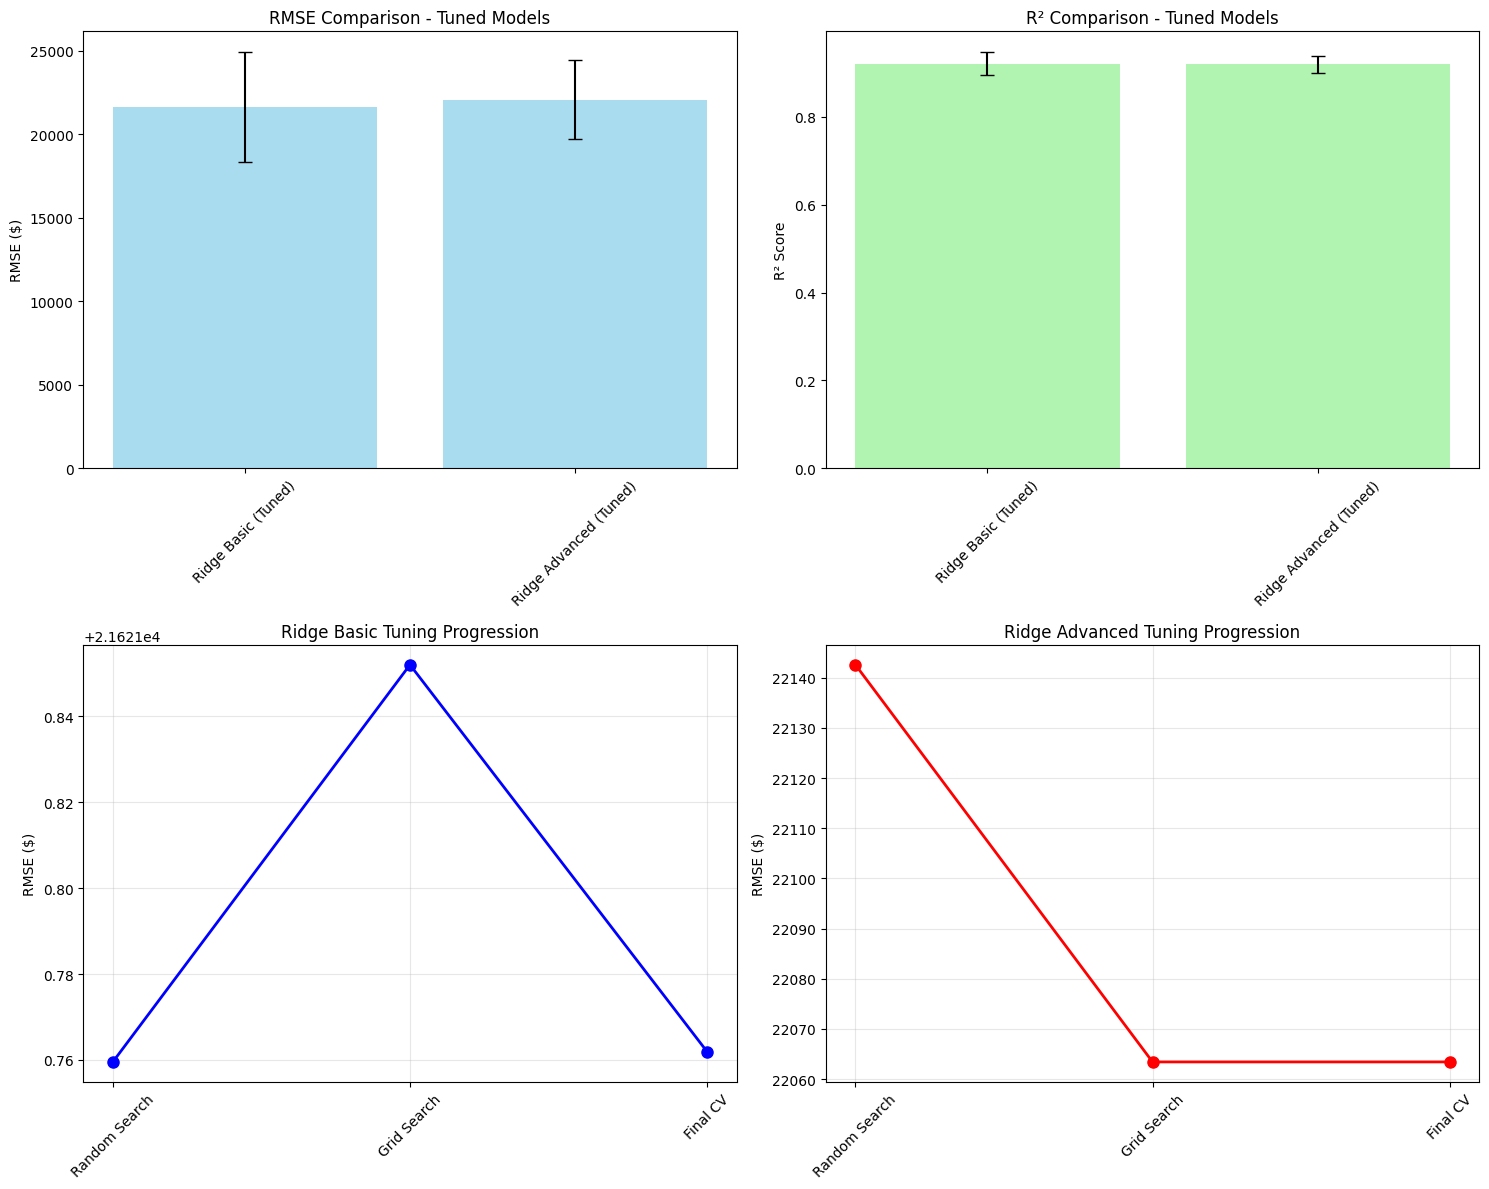

In [7]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. RMSE Comparison (Tuned models only)
axes[0,0].bar(tuning_comparison_df['Model'], tuning_comparison_df['RMSE'], 
             yerr=tuning_comparison_df['RMSE_std'], capsize=5, alpha=0.7, color='skyblue')
axes[0,0].set_title('RMSE Comparison - Tuned Models')
axes[0,0].set_ylabel('RMSE ($)')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. R² Comparison (Tuned models only)
axes[0,1].bar(tuning_comparison_df['Model'], tuning_comparison_df['R²'], 
             yerr=tuning_comparison_df['R²_std'], capsize=5, alpha=0.7, color='lightgreen')
axes[0,1].set_title('R² Comparison - Tuned Models')
axes[0,1].set_ylabel('R² Score')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Tuning Phase Progression - Basic
basic_phases = ['Random Search', 'Grid Search', 'Final CV']
basic_rmse_values = [
    ridge_basic_tuning['phase_results']['random_search_rmse'],
    ridge_basic_tuning['phase_results']['grid_search_rmse'],
    ridge_basic_tuning['phase_results']['final_cv_rmse']
]
axes[1,0].plot(basic_phases, basic_rmse_values, 'o-', linewidth=2, markersize=8, color='blue', label='Basic')
axes[1,0].set_title('Ridge Basic Tuning Progression')
axes[1,0].set_ylabel('RMSE ($)')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(True, alpha=0.3)

# 4. Tuning Phase Progression - Advanced
advanced_phases = ['Random Search', 'Grid Search', 'Final CV']
advanced_rmse_values = [
    ridge_advanced_tuning['phase_results']['random_search_rmse'],
    ridge_advanced_tuning['phase_results']['grid_search_rmse'],
    ridge_advanced_tuning['phase_results']['final_cv_rmse']
]
axes[1,1].plot(advanced_phases, advanced_rmse_values, 'o-', linewidth=2, markersize=8, color='red', label='Advanced')
axes[1,1].set_title('Ridge Advanced Tuning Progression')
axes[1,1].set_ylabel('RMSE ($)')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


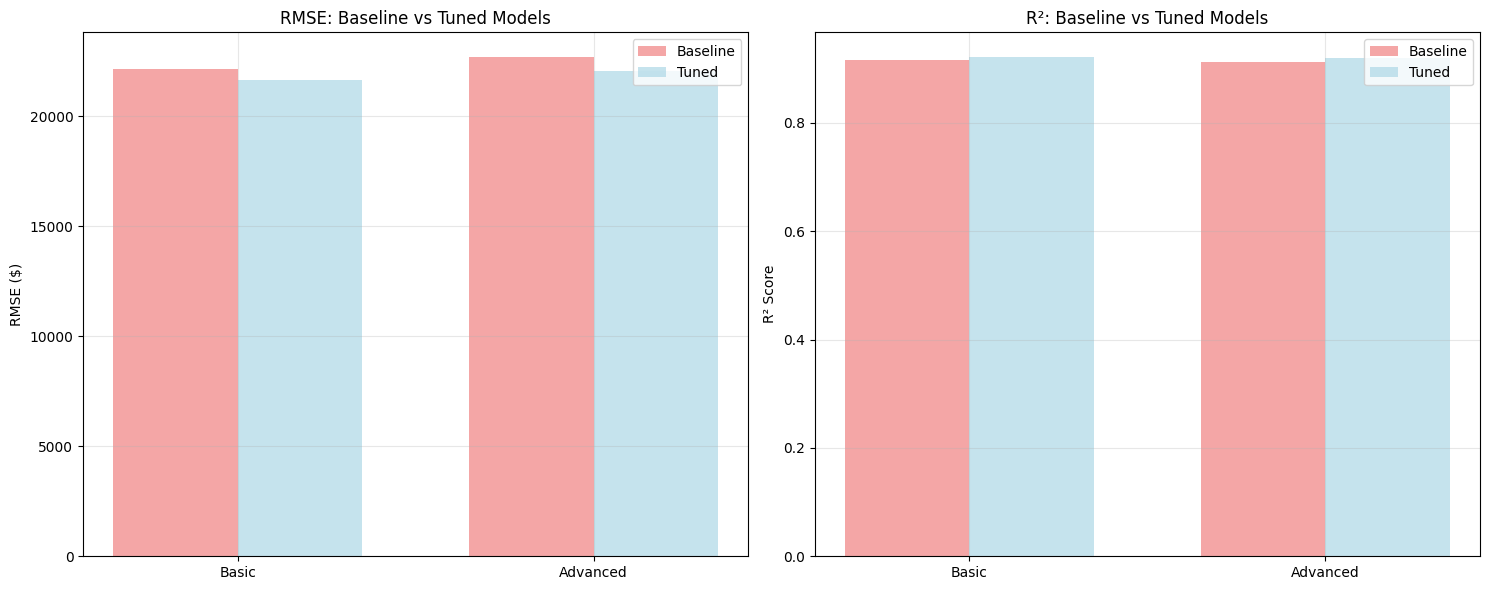

In [8]:
# Comprehensive baseline vs tuned comparison visualization (if baseline data available)
if 'comprehensive_df' in locals() and 'Type' in comprehensive_df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Separate data by type
    baseline_data = comprehensive_df[comprehensive_df['Type'] == 'Baseline']
    tuned_data = comprehensive_df[comprehensive_df['Type'] == 'Tuned']
    
    # RMSE Comparison
    x_pos = np.arange(len(baseline_data))
    width = 0.35
    
    axes[0].bar(x_pos - width/2, baseline_data['RMSE'], width, 
               label='Baseline', alpha=0.7, color='lightcoral')
    axes[0].bar(x_pos + width/2, tuned_data['RMSE'], width, 
               label='Tuned', alpha=0.7, color='lightblue')
    
    axes[0].set_title('RMSE: Baseline vs Tuned Models')
    axes[0].set_ylabel('RMSE ($)')
    axes[0].set_xticks(x_pos)
    axes[0].set_xticklabels(['Basic', 'Advanced'])
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # R² Comparison
    axes[1].bar(x_pos - width/2, baseline_data['R²'], width, 
               label='Baseline', alpha=0.7, color='lightcoral')
    axes[1].bar(x_pos + width/2, tuned_data['R²'], width, 
               label='Tuned', alpha=0.7, color='lightblue')
    
    axes[1].set_title('R²: Baseline vs Tuned Models')
    axes[1].set_ylabel('R² Score')
    axes[1].set_xticks(x_pos)
    axes[1].set_xticklabels(['Basic', 'Advanced'])
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


In [9]:
# Save hyperparameter tuning comparison results
best_tuned = tuning_comparison_df.iloc[0]

tuning_comparison_summary = {
    'comparison_table': tuning_comparison_df.to_dict('records'),
    'best_tuned_model': {
        'name': best_tuned['Model'],
        'rmse': best_tuned['RMSE'],
        'rmse_std': best_tuned['RMSE_std'],
        'mae': best_tuned['MAE'],
        'mae_std': best_tuned['MAE_std'],
        'r2': best_tuned['R²'],
        'r2_std': best_tuned['R²_std'],
        'best_alpha': best_tuned['Best_Alpha'],
        'best_solver': best_tuned['Best_Solver'],
        'best_threshold': best_tuned['Best_Threshold']
    },
    'model_ranking': tuning_comparison_df['Model'].tolist(),
    'tuning_phase_analysis': {
        'ridge_basic': {
            'random_search_rmse': ridge_basic_tuning['phase_results']['random_search_rmse'],
            'grid_search_rmse': ridge_basic_tuning['phase_results']['grid_search_rmse'],
            'final_cv_rmse': ridge_basic_tuning['phase_results']['final_cv_rmse'],
            'baseline_improvement_pct': ridge_basic_tuning['baseline_comparison']['rmse_improvement_pct']
        },
        'ridge_advanced': {
            'random_search_rmse': ridge_advanced_tuning['phase_results']['random_search_rmse'],
            'grid_search_rmse': ridge_advanced_tuning['phase_results']['grid_search_rmse'],
            'final_cv_rmse': ridge_advanced_tuning['phase_results']['final_cv_rmse'],
            'baseline_improvement_pct': ridge_advanced_tuning['baseline_comparison']['rmse_improvement_pct']
        }
    }
}

In [14]:

import os
import pickle
os.makedirs('../../models/tuned/', exist_ok=True)
with open('../../models/tuned/hyperparameter_tuning_comparison_summary.pkl', 'wb') as f:
    pickle.dump(tuning_comparison_summary, f)

# Export to CSV for easy viewing
tuning_comparison_df.to_csv('../../models/tuned/hyperparameter_tuning_comparison.csv', index=False)

print("\nHyperparameter tuning comparison completed")
print(f"Results saved to models/tuned/hyperparameter_tuning_comparison_summary.pkl")
print(f"CSV exported to models/tuned/hyperparameter_tuning_comparison.csv")

print(f"\nBest Tuned Model: {best_tuned['Model']}")
print(f"   RMSE: ${best_tuned['RMSE']:,.0f} (±${best_tuned['RMSE_std']:,.0f})")
print(f"   MAE:  ${best_tuned['MAE']:,.0f} (±${best_tuned['MAE_std']:,.0f})")
print(f"   R²:   {best_tuned['R²']:.4f} (±{best_tuned['R²_std']:.4f})")
print(f"   Alpha: {best_tuned['Best_Alpha']:.6f}")
print(f"   Solver: {best_tuned['Best_Solver']}")
print(f"   Threshold: {best_tuned['Best_Threshold']}")



Hyperparameter tuning comparison completed
Results saved to models/tuned/hyperparameter_tuning_comparison_summary.pkl
CSV exported to models/tuned/hyperparameter_tuning_comparison.csv

Best Tuned Model: Ridge Basic (Tuned)
   RMSE: $21,622 (±$3,281)
   MAE:  $13,618 (±$890)
   R²:   0.9212 (±0.0261)
   Alpha: 0.868511
   Solver: sag
   Threshold: mean
